# Binary-Hypothesis-Testing

## Imports

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import seaborn as sns
import math

### Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Hypothesis Testing vs Binary Classification

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1M_IHEaxrkTThR0SiMPo_qpcIpbDMK0Rt/Hypothesis Testing vs Binary Classification


In [3]:
print(os.listdir('./'))

['Binary-Classification.ipynb', 'Dataset', 'Binary-Hypothesis-Testing.ipynb']


### Importing Dataset
Dataset: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

**Dataset Information:**
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.



**Attribute Information:**
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

In [4]:
print(os.listdir('./'))

['Binary-Classification.ipynb', 'Dataset', 'Binary-Hypothesis-Testing.ipynb']


In [5]:
Dataset = []
with open("Dataset/data_banknote_authentication.txt") as f:
	for line in f:
		Dataset.append([float(d) for d in line.split(",")])
Dataset = np.array(Dataset)

# Input
X = Dataset[:,0:4]

# Labels
y = Dataset[:,4]

In [6]:
X0 = X[y==0]
y0 = y[y==0]
X1 = X[y==1]
y1 = y[y==1]

In [7]:
variance0 = X0[:,0]
skewness0 = X0[:,1]
curtosis0 = X0[:,2]
entropy0 = X0[:,3]

variance1 = X1[:,0]
skewness1 = X1[:,1]
curtosis1 = X1[:,2]
entropy1 = X1[:,3]


Text(0.5, 1.0, 'Density of Entropy in Real Notes')

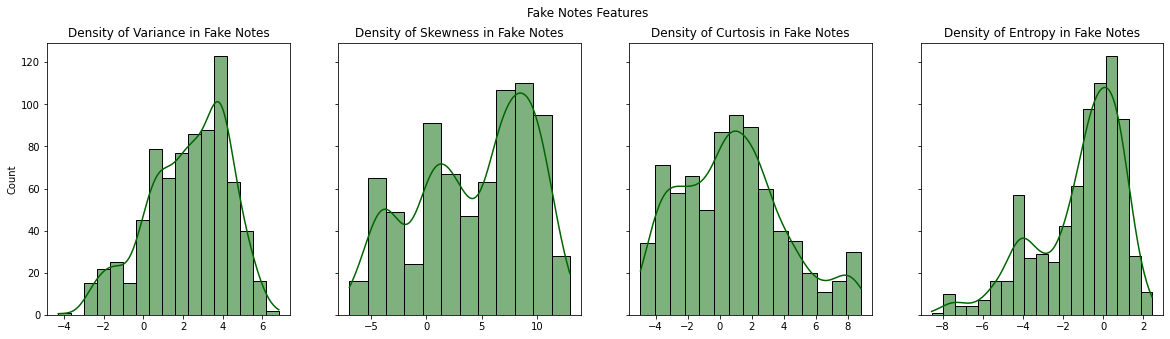

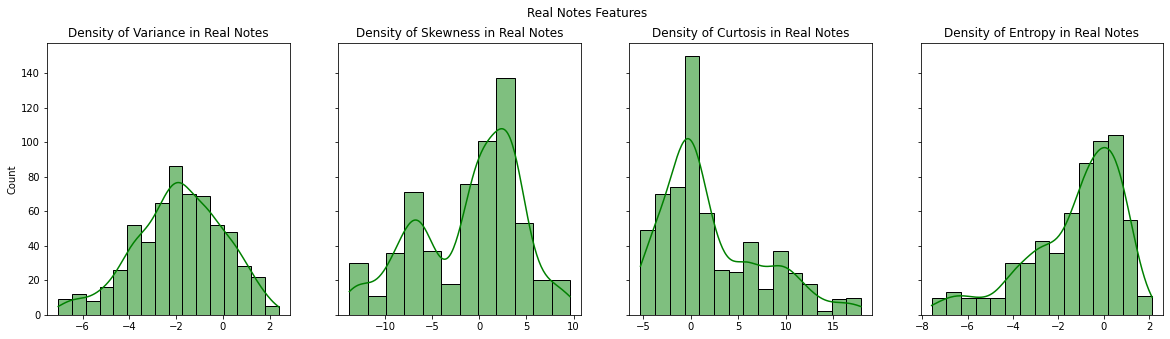

In [8]:
# Fake Notes
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Fake Notes Features')

sns.histplot(ax = axes[0], x=variance0,color = 'darkgreen',kde=True)
axes[0].set_title("Density of Variance in Fake Notes")

sns.histplot(ax = axes[1], x=skewness0,color = 'darkgreen',kde=True)
axes[1].set_title("Density of Skewness in Fake Notes")

sns.histplot(ax = axes[2], x=curtosis0,color = 'darkgreen',kde=True)
axes[2].set_title("Density of Curtosis in Fake Notes")

sns.histplot(ax = axes[3], x=entropy0,color = 'darkgreen',kde=True)
axes[3].set_title("Density of Entropy in Fake Notes")

# For Real Notes
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Real Notes Features')

sns.histplot(ax = axes[0], x=variance1,color = 'green',kde=True)
axes[0].set_title("Density of Variance in Real Notes")

sns.histplot(ax = axes[1], x=skewness1,color = 'green',kde=True)
axes[1].set_title("Density of Skewness in Real Notes")

sns.histplot(ax = axes[2], x=curtosis1,color = 'green',kde=True)
axes[2].set_title("Density of Curtosis in Real Notes")

sns.histplot(ax = axes[3], x=entropy1,color = 'green',kde=True)
axes[3].set_title("Density of Entropy in Real Notes")

## Hypothesis Testing

### T-test

In [9]:
def calculateT(x0,x1):
    n0 = x0.shape[0]
    n1 = x1.shape[0]
    mu0 = np.mean(x0)
    mu1 = np.mean(x1)
    ss0 = np.sum(np.square(x0))
    ss1 = np.sum(np.square(x1))
    num = mu0 - mu1
    den = np.sqrt((((ss0 - (mu0**2)/n0) + (ss1 - (mu1**2)/n1))/(n0+n1-2)) * ((1/n0)+(1/n1)))
    t = num/den
    return t

In [10]:
# Critical T value for 1370 degrees of freedom with 95% Confidence Intervel is
critical_t_value = 1.961697

For Variance Feature

In [11]:
t_value_var = calculateT(variance0,variance1)
print("T value for Variance",t_value_var)

T value for Variance 26.521853946817174


For Skewness Feature

In [12]:
t_value_skew = calculateT(skewness0,skewness1)
print("T value for Skewness",t_value_skew)

T value for Skewness 15.64122945184385


For Curtosis Feature

In [13]:
t_value_cur = calculateT(curtosis0,curtosis1)
print("T value for Curtosis",t_value_cur)

T value for Curtosis -5.488244751716596


For Entropy Feature

In [14]:
t_value_ent = calculateT(entropy0,entropy1)
print("T value for Entropy",t_value_ent)

T value for Entropy 0.7540693601356663


### Neyman-Pearson Hypothesis Testing

#### Assuming Gaussian Distribution

$\textbf{Null Hypothesis:}$ The Bank Note is Fake <br>
$\textbf{Alternate Hypothesis:}$: The Bank Note is Real<br>

LRT = $\frac{P_{0}}{P_{1}}$ <br>
If LRT > 1 : We choose NULL Hypotheses <br>
Else: We choose ALternate Hypothesis 


In [15]:

#Creating a Normal Density Function.
def normal_dist(x , mean , sd):
    prob_density = (1/(np.pi*sd)) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

# Returns CDF of a Normal Distribution
def CDF_normal(x,mean,std):
    return 0.5*(1+math.erf((x-mean)/(np.sqrt(2)*std)))

# Returns the point where LRT = 1 for two normal distributions
def calculate_crit(mu0,std0,mu1,std1):
    x = np.linspace(mu0-10,mu1+10,20000000)

    P0 = normal_dist(x,mu0,std0)
    P1 = normal_dist(x,mu1,std1)

    x_crit_arr = []
    i = 0
    while(i<len(x)):
        if(i<len(x) and P0[i]<=P1[i]+1e-7 and P0[i]>=P1[i]-1e-7 and P0[i]!=0 and P1[i]!=0):
            temp = []
            while(i<len(x) and P0[i]<=P1[i]+1e-7 and P0[i]>=P1[i]-1e-7):
                temp.append(x[i])
                # print(i)
                i = i+1
            x_crit_arr.append(np.mean(temp))
        i = i+1
    # print(len(x_crit_arr),x_crit_arr)
    plt.figure()
    plt.plot(x,P0,label="$P_{0}$")
    plt.plot(x,P1,label="$P_{1}$")
    plt.legend()
    plt.show()
    return x_crit_arr

For Variance Feature

In [16]:
# Mean and Standard Deviation for Variance feature for both Null and Alternate Hypothesis
mu0_var = np.mean(variance0)
mu1_var = np.mean(variance1)

std0_var = np.std(variance0)
std1_var = np.std(variance1)

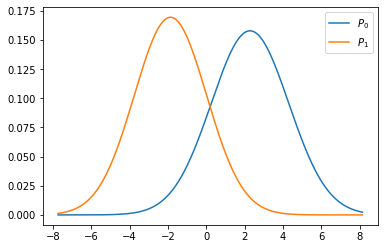

The value where LRT is equal to 1 is [0.19547090657362354]


In [17]:
x_crit_var = calculate_crit(mu0_var, std0_var, mu1_var, std1_var)
print("The value where LRT is equal to 1 is",x_crit_var)

In [18]:
if(len(x_crit_var) == 1):
    if(mu0_var > mu1_var):
        p_alpha_var = CDF_normal(x_crit_var[0],mu0_var,std0_var)
        p_detection_var = CDF_normal(x_crit_var[0],mu1_var,std1_var)
    else:
        p_alpha_var = 1-CDF_normal(x_crit_var[0],mu0_var,std0_var)
        p_detection_var = 1-CDF_normal(x_crit_var[0],mu0_var,std0_var)
else:
    if(mu0_var > mu1_var):
        p_alpha_var = CDF_normal(x_crit_var[1],mu0_var,std0_var) - CDF_normal(x_crit_var[0],mu0_var,std0_var)
        p_detection_var = CDF_normal(x_crit_var[1],mu1_var,std1_var) - CDF_normal(x_crit_var[0],mu1_var,std1_var)
    else:
        p_alpha_var = 1 - (CDF_normal(x_crit_var[1],mu0_var,std0_var) - CDF_normal(x_crit_var[0],mu0_var,std0_var))
        p_detection_var = 1 - (CDF_normal(x_crit_var[1],mu1_var,std1_var) - CDF_normal(x_crit_var[0],mu1_var,std1_var))
print("False Alarm Probability is",p_alpha_var)
print("Probability of Detection is",p_detection_var)

False Alarm Probability is 0.15119679021147514
Probability of Detection is 0.86390573891332


For Skewness Feature

In [19]:
# Mean and Standard Deviation for Skewness feature for both Null and Alternate Hypothesis
mu0_skew = np.mean(skewness0)
mu1_skew = np.mean(skewness1)

std0_skew = np.std(skewness0)
std1_skew = np.std(skewness1)

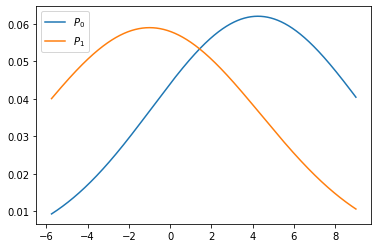

The value where LRT is equal to 1 is [1.4324191226770222]


In [20]:
x_crit_skew = calculate_crit(mu0_skew, std0_skew, mu1_skew, std1_skew)
print("The value where LRT is equal to 1 is",x_crit_skew)

In [22]:
if(len(x_crit_skew) == 1):
    if(mu0_skew > mu1_skew):
        p_alpha_skew = CDF_normal(x_crit_skew[0],mu0_skew,std0_skew)
        p_detection_skew = CDF_normal(x_crit_skew[0],mu1_skew,std1_skew)
    else:
        p_alpha_skew = 1-CDF_normal(x_crit_skew[0],mu0_skew,std0_skew)
        p_detection_skew = 1-CDF_normal(x_crit_skew[0],mu1_skew,std1_skew)
else:
    if(mu0_skew > mu1_skew):
        p_alpha_skew = CDF_normal(x_crit_skew[1],mu0_skew,std0_skew) - CDF_normal(x_crit_skew[0],mu0_skew,std0_skew)
        p_detection_skew = CDF_normal(x_crit_skew[1],mu1_skew,std1_skew) - CDF_normal(x_crit_skew[0],mu1_skew,std1_skew)
    else:
        p_alpha_skew = 1 - (CDF_normal(x_crit_skew[1],mu0_skew,std0_skew) - CDF_normal(x_crit_skew[0],mu0_skew,std0_skew))
        p_detection_skew = 1 - (CDF_normal(x_crit_skew[1],mu1_skew,std1_skew) - CDF_normal(x_crit_skew[0],mu1_skew,std1_skew))
print("False Alarm Probability is",p_alpha_skew)
print("Probability of Detection is",p_detection_skew)

False Alarm Probability is 0.2911778789295889
Probability of Detection is 0.6733638088083761


For Curtosis Feature

In [23]:
# Mean and Standard Deviation for Curtosis feature for both Null and Alternate Hypothesis
mu0_cur = np.mean(curtosis0)
mu1_cur = np.mean(curtosis1)

std0_cur = np.std(curtosis0)
std1_cur = np.std(curtosis1)

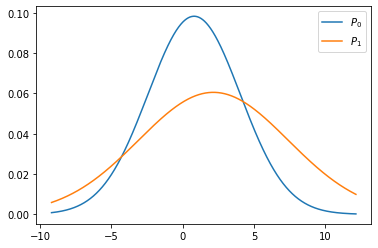

The value where LRT is equal to 1 is [-4.291859306814289, 4.233773012898859]


In [24]:
x_crit_cur = calculate_crit(mu0_cur, std0_cur, mu1_cur, std1_cur)
print("The value where LRT is equal to 1 is",x_crit_cur)

In [25]:
if(len(x_crit_cur) == 1):
    if(mu0_cur > mu1_cur):
        p_alpha_cur = CDF_normal(x_crit_cur[0],mu0_cur,std0_cur)
        p_detection_cur = CDF_normal(x_crit_cur[0],mu1_cur,std1_cur)
    else:
        p_alpha_cur = 1-CDF_normal(x_crit_cur[0],mu0_cur,std0_cur)
        p_detection_cur = 1-CDF_normal(x_crit_cur[0],mu1_cur,std1_cur)
else:
    if(mu0_cur > mu1_cur):
        p_alpha_cur = CDF_normal(x_crit_cur[1],mu0_cur,std0_cur) - CDF_normal(x_crit_cur[0],mu0_cur,std0_cur)
        p_detection_cur = CDF_normal(x_crit_cur[1],mu1_cur,std1_cur) - CDF_normal(x_crit_cur[0],mu1_cur,std1_cur)
    else:
        p_alpha_cur = 1 - (CDF_normal(x_crit_cur[1],mu0_cur,std0_cur) - CDF_normal(x_crit_cur[0],mu0_cur,std0_cur))
        p_detection_cur = 1 - (CDF_normal(x_crit_cur[1],mu1_cur,std1_cur) - CDF_normal(x_crit_cur[0],mu1_cur,std1_cur))
print("False Alarm Probability is",p_alpha_cur)
print("Probability of Detection is",p_detection_cur)

False Alarm Probability is 0.20223778447247276
Probability of Detection is 0.45610309356279766


For Entropy Feature

In [26]:
# Mean and Standard Deviation for Entropy feature for both Null and Alternate Hypothesis
mu0_ent = np.mean(entropy0)
mu1_ent = np.mean(entropy1)

std0_ent = np.std(entropy0)
std1_ent = np.std(entropy1)

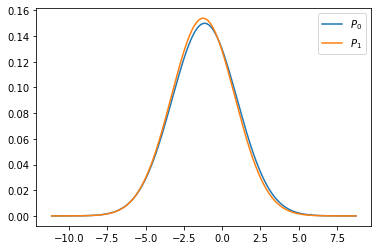

The value where LRT is equal to 1 is [-5.939395698571788, -0.2710912338260746]


In [27]:
x_crit_ent = calculate_crit(mu0_ent, std0_ent, mu1_ent, std1_ent)
print("The value where LRT is equal to 1 is",x_crit_ent)

In [28]:
if(len(x_crit_ent) == 1):
    if(mu0_ent > mu1_ent):
        p_alpha_ent = CDF_normal(x_crit_ent[0],mu0_ent,std0_ent)
        p_detection_ent = CDF_normal(x_crit_ent[0],mu1_ent,std1_ent)
    else:
        p_alpha_ent = 1-CDF_normal(x_crit_ent[0],mu0_ent,std0_ent)
        p_detection_ent = 1-CDF_normal(x_crit_ent[0],mu1_cur,std1_ent)
else:
    if(mu0_ent > mu1_ent):
        p_alpha_ent = CDF_normal(x_crit_ent[1],mu0_ent,std0_ent) - CDF_normal(x_crit_ent[0],mu0_ent,std0_ent)
        p_detection_ent = CDF_normal(x_crit_ent[1],mu1_ent,std1_ent) - CDF_normal(x_crit_ent[0],mu1_ent,std1_ent)
    else:
        p_alpha_ent = 1 - (CDF_normal(x_crit_ent[1],mu0_ent,std0_ent) - CDF_normal(x_crit_ent[0],mu0_ent,std0_ent))
        p_detection_ent = 1 - (CDF_normal(x_crit_ent[1],mu1_ent,std1_ent) - CDF_normal(x_crit_ent[0],mu1_ent,std1_ent))
print("False Alarm Probability is",p_alpha_ent)
print("Probability of Detection is",p_detection_ent)

False Alarm Probability is 0.6480804059616245
Probability of Detection is 0.6696673926972907
